# Classify Stock News 

classify the news as good,neutral,bad

In [622]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
warnings.filterwarnings("ignore")
# download lexicon for analyzer
nltk.downloader.download('vader_lexicon')
# pass the processed data to the sentiment intensity analyzer 
vader = SentimentIntensityAnalyzer() # initiate the analyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [623]:
website = 'https://finviz.com/quote.ashx?t=' # link to news website

bio_news = {} # dictionary to hold the bio tickers news 
bio_tickers = ['SRNE','AZN','PFE'] # list of tickers to analyze
#tech_tickers = 
#EV_tickers = 
#Energy_tickers = 
for ticker in bio_tickers:
    url = website + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # save the content of the html webpage
    html = BeautifulSoup(response)
    # now we need to find the table with the id=news-table from the html page inside the table 
    news_table = html.find(id='news-table')
    # save the table in the news dictionary 
    bio_news[ticker] = news_table
#bio_news  
# analyze the structure of news variable we need to identify each row and coloumn and 
# then get the information inside each <a> element which represents the text of the news.
# and <td> elements which represents the time and the date of the news. 
#srne = news['SRNE']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
#srne_tr = srne.findAll('tr')

#for i, table_row in enumerate(srne_tr):
    # Read the text of the element 'a' into 'link_text'
    #a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    #td_text = table_row.td.text
    #print(a_text) # the text of the news
    #print(td_text) # time and date
    #if i == 3:
        #break 
        
# data preprocessing. 
Processed_bio_news = []
for file_name, news_table in bio_news.items():
    # Iterate through all <tr>
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # cuz some of the columns only consists of time 
        if len(date_scrape) == 1:
            time = date_scrape[0]           
        # date and time correct format  
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name 
        ticker = file_name.split('_')[0]       
        # Append ticker, date, time and headline 
        Processed_bio_news.append([ticker, date, time, text])        
#Processed_bio_news   

In [624]:
# New words and values to help the NLP analyzer catch news about stock better
bio_new_words = {
'lifting':5,
'contract':5,
'treatment':5,
'darpa':5,
'receives':5,
'higher':5,
'competition':-5,
'federal':5,
'jumping':5,
'efficient':5,
'shorted':-5,
'away':-5,
'fda':5,
'nod':5,
'spike':5,
'releases':5,
'preclinical':5,
'sti-1499':5,
'sti-2020':5,
'identifies':5,
'running':-5,
'showcase':5,
'jumped':5,
'pipeline':5,
'adds':5,
'risky':-5,
'riskly':-5,   
'spike':5, 
'covi=drops':5, 
'plummeted':-5,
'surging':5,
'identifies':5,
'ultra-risky':-5,
'files':5,
'eua':5,
'recover':5,
'Stumble':-5,
'recovers':5,
'restrictions':-2,
'beat':5,    
'beats':5         
 }
# Update the lexicon
vader.lexicon.update(bio_new_words)
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
bio_news_df = pd.DataFrame(Processed_bio_news, columns=columns)

# get the score for each news
bio_scores = bio_news_df['headline'].apply(vader.polarity_scores).tolist()
bio_scores_df = pd.DataFrame(bio_scores)
# Join the DataFrames
bio_news_df = bio_news_df.join(bio_scores_df, rsuffix='_right')
# Convert the date column from string to datetime
bio_news_df['date'] = pd.to_datetime(bio_news_df.date).dt.date
#bio_news_df
# save the data to csv file 
bio_news_df.to_csv("bio_news_analysis.csv", encoding='utf-8', index=False)


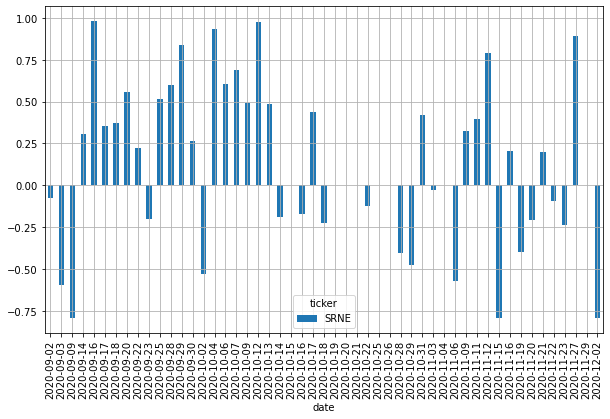

In [625]:
#plot SRNE
plt.rcParams['figure.figsize'] = [10, 6]
SRNE = bio_news_df.loc[bio_news_df['ticker'] == "SRNE"]
bio_mean_scores = SRNE.groupby(['ticker','date']).mean()
bio_mean_scores = bio_mean_scores.unstack()
bio_mean_scores = bio_mean_scores.xs('compound', axis="columns").transpose()
# Plot 
bio_mean_scores.plot(kind = 'bar')
plt.grid()

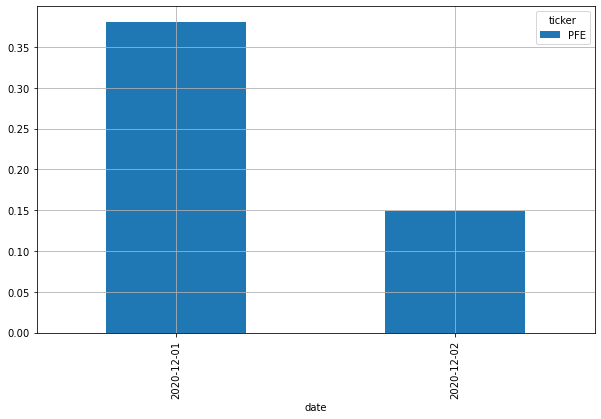

In [626]:
#plot AZN
plt.rcParams['figure.figsize'] = [10, 6]
AZN = bio_news_df.loc[bio_news_df['ticker'] == "AZN"]
bio_mean_scores1 = PFE.groupby(['ticker','date']).mean()
bio_mean_scores1 = bio_mean_scores1.unstack()
bio_mean_scores1 = bio_mean_scores1.xs('compound', axis="columns").transpose()
# Plot 
bio_mean_scores1.plot(kind = 'bar')
plt.grid()

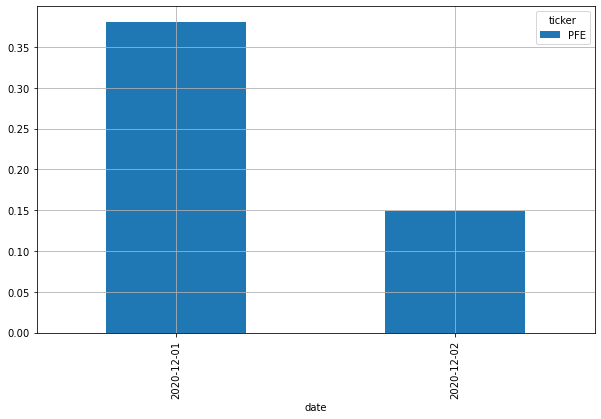

In [627]:
#plot PFE
plt.rcParams['figure.figsize'] = [10, 6]
PFE = bio_news_df.loc[bio_news_df['ticker'] == "PFE"]
bio_mean_scores2 = PFE.groupby(['ticker','date']).mean()
bio_mean_scores2 = bio_mean_scores2.unstack()
bio_mean_scores2 = bio_mean_scores2.xs('compound', axis="columns").transpose()
# Plot 
bio_mean_scores2.plot(kind = 'bar')
plt.grid()

In [628]:
tech_tickers = ['AAPL','NVDA','MSFT']
tech_news={}

for ticker in tech_tickers:
    url = website + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # save the content of the html webpage
    html = BeautifulSoup(response)
    # now we need to find the table with the id=news-table from the html page inside the table 
    news_table = html.find(id='news-table')
    # save the table in the news dictionary 
    tech_news[ticker] = news_table

        
# data preprocessing. 
Processed_tech_news = []
for file_name, news_table in tech_news.items():
    # Iterate through all <tr>
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # cuz some of the columns only consists of time 
        if len(date_scrape) == 1:
            time = date_scrape[0]           
        # date and time correct format  
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name 
        ticker = file_name.split('_')[0]       
        # Append ticker, date, time and headline 
        Processed_tech_news.append([ticker, date, time, text])        
#Processed_tech_news   

In [629]:
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
tech_news_df = pd.DataFrame(Processed_tech_news, columns=columns)

# get the score for each news
tech_scores = tech_news_df['headline'].apply(vader.polarity_scores).tolist()
tech_scores_df = pd.DataFrame(tech_scores)
# Join the DataFrames
tech_news_df = tech_news_df.join(tech_scores_df, rsuffix='_right')
# Convert the date column from string to datetime
tech_news_df['date'] = pd.to_datetime(tech_news_df.date).dt.date
#tech_news_df
# save the data to csv file 
tech_news_df.to_csv("tech_news_analysis.csv", encoding='utf-8', index=False)


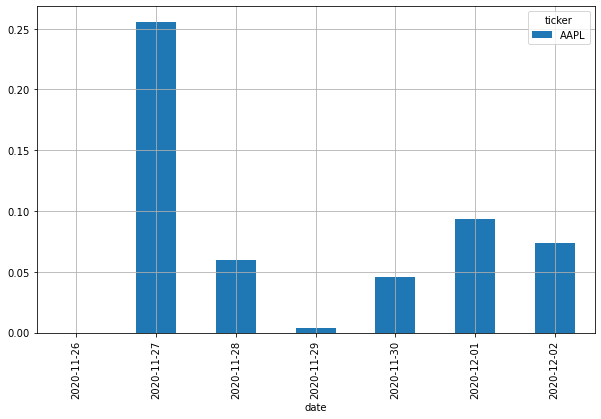

In [630]:
#plot AAPL
plt.rcParams['figure.figsize'] = [10, 6]
AAPL = tech_news_df.loc[tech_news_df['ticker'] == "AAPL"]
tech_mean_scores = AAPL.groupby(['ticker','date']).mean()
tech_mean_scores = tech_mean_scores.unstack()
tech_mean_scores = tech_mean_scores.xs('compound', axis="columns").transpose()
# Plot 
tech_mean_scores.plot(kind = 'bar')
plt.grid()

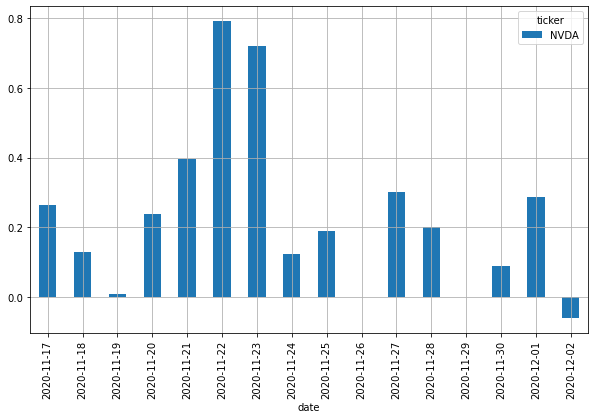

In [631]:
#plot NVDA
plt.rcParams['figure.figsize'] = [10, 6]
NVDA = tech_news_df.loc[tech_news_df['ticker'] == "NVDA"]
tech_mean_scores1 = NVDA.groupby(['ticker','date']).mean()
tech_mean_scores1 = tech_mean_scores1.unstack()
tech_mean_scores1 = tech_mean_scores1.xs('compound', axis="columns").transpose()
# Plot 
tech_mean_scores1.plot(kind = 'bar')
plt.grid()

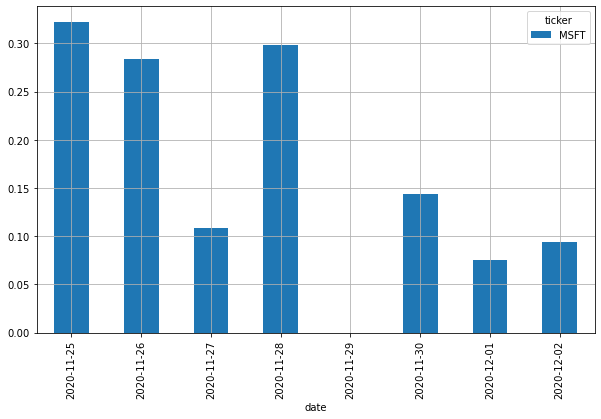

In [632]:
#plot MSFT
plt.rcParams['figure.figsize'] = [10, 6]
MSFT = tech_news_df.loc[tech_news_df['ticker'] == "MSFT"]
tech_mean_scores2 = MSFT.groupby(['ticker','date']).mean()
tech_mean_scores2 = tech_mean_scores2.unstack()
tech_mean_scores2 = tech_mean_scores2.xs('compound', axis="columns").transpose()
# Plot 
tech_mean_scores2.plot(kind = 'bar')
plt.grid()

In [633]:
ev_tickers = ['TSLA','NIO','PLTR']
ev_news={}

for ticker in ev_tickers:
    url = website + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # save the content of the html webpage
    html = BeautifulSoup(response)
    # now we need to find the table with the id=news-table from the html page inside the table 
    news_table = html.find(id='news-table')
    # save the table in the news dictionary 
    ev_news[ticker] = news_table

        
# data preprocessing. 
Processed_ev_news = []
for file_name, news_table in ev_news.items():
    # Iterate through all <tr>
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # cuz some of the columns only consists of time 
        if len(date_scrape) == 1:
            time = date_scrape[0]           
        # date and time correct format  
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name 
        ticker = file_name.split('_')[0]       
        # Append ticker, date, time and headline 
        Processed_ev_news.append([ticker, date, time, text])        
#Processed_ev_news   

In [634]:
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
ev_news_df = pd.DataFrame(Processed_ev_news, columns=columns)

# get the score for each news
ev_scores = ev_news_df['headline'].apply(vader.polarity_scores).tolist()
ev_scores_df = pd.DataFrame(ev_scores)
# Join the DataFrames
ev_news_df = ev_news_df.join(ev_scores_df, rsuffix='_right')
# Convert the date column from string to datetime
ev_news_df['date'] = pd.to_datetime(ev_news_df.date).dt.date
#ev_news_df
# save the data to csv file 
ev_news_df.to_csv("ev_news_analysis.csv", encoding='utf-8', index=False)

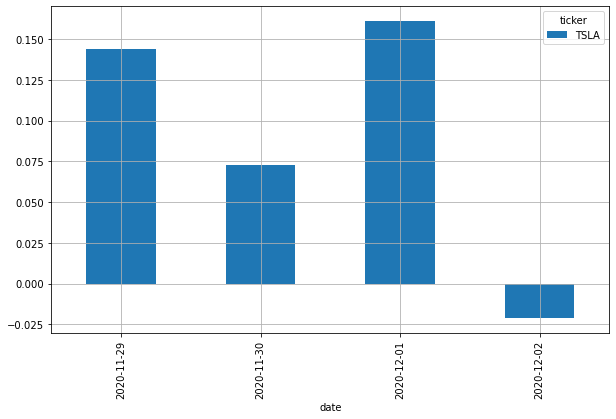

In [635]:
#plot TSLA
plt.rcParams['figure.figsize'] = [10, 6]
TSLA = ev_news_df.loc[ev_news_df['ticker'] == "TSLA"]
ev_mean_scores = TSLA.groupby(['ticker','date']).mean()
ev_mean_scores = ev_mean_scores.unstack()
ev_mean_scores = ev_mean_scores.xs('compound', axis="columns").transpose()
# Plot 
ev_mean_scores.plot(kind = 'bar')
plt.grid()

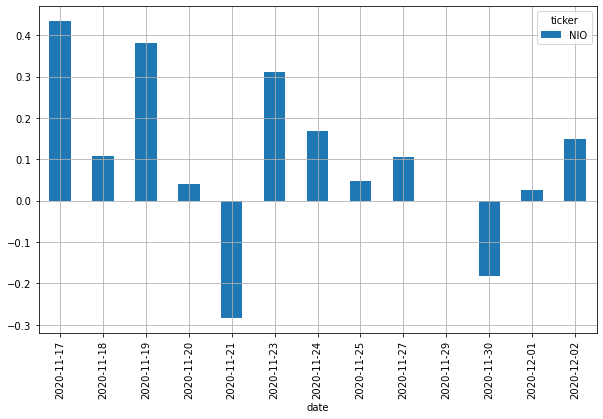

In [636]:
#plot NIO
plt.rcParams['figure.figsize'] = [10, 6]
NIO = ev_news_df.loc[ev_news_df['ticker'] == "NIO"]
ev_mean_scores1 = NIO.groupby(['ticker','date']).mean()
ev_mean_scores1 = ev_mean_scores1.unstack()
ev_mean_scores1 = ev_mean_scores1.xs('compound', axis="columns").transpose()
# Plot 
ev_mean_scores1.plot(kind = 'bar')
plt.grid()

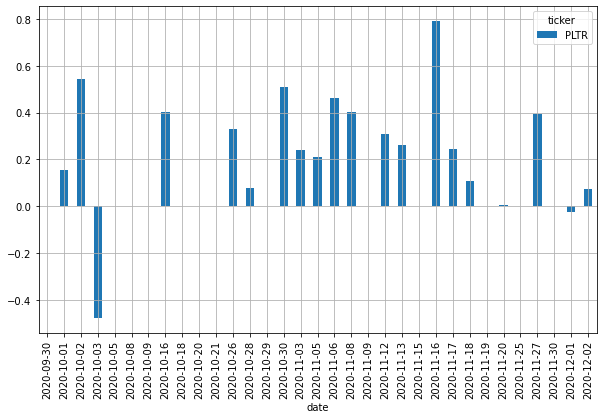

In [637]:
#plot PLTR
plt.rcParams['figure.figsize'] = [10, 6]
PLTR = ev_news_df.loc[ev_news_df['ticker'] == "PLTR"]
ev_mean_scores2 = PLTR.groupby(['ticker','date']).mean()
ev_mean_scores2 = ev_mean_scores2.unstack()
ev_mean_scores2 = ev_mean_scores2.xs('compound', axis="columns").transpose()
# Plot 
ev_mean_scores2.plot(kind = 'bar')
plt.grid()

In [638]:
energy_tickers = ['FCEL','WWR','GEVO']
energy_news={}

for ticker in energy_tickers:
    url = website + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # save the content of the html webpage
    html = BeautifulSoup(response)
    # now we need to find the table with the id=news-table from the html page inside the table 
    news_table = html.find(id='news-table')
    # save the table in the news dictionary 
    energy_news[ticker] = news_table

        
# data preprocessing. 
Processed_energy_news = []
for file_name, news_table in energy_news.items():
    # Iterate through all <tr>
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # cuz some of the columns only consists of time 
        if len(date_scrape) == 1:
            time = date_scrape[0]           
        # date and time correct format  
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name 
        ticker = file_name.split('_')[0]       
        # Append ticker, date, time and headline 
        Processed_energy_news.append([ticker, date, time, text])        
#Processed_energy_news   

In [639]:
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
energy_news_df = pd.DataFrame(Processed_energy_news, columns=columns)

# get the score for each news
energy_scores = energy_news_df['headline'].apply(vader.polarity_scores).tolist()
energy_scores_df = pd.DataFrame(energy_scores)
# Join the DataFrames
energy_news_df = energy_news_df.join(energy_scores_df, rsuffix='_right')
# Convert the date column from string to datetime
energy_news_df['date'] = pd.to_datetime(energy_news_df.date).dt.date
#ev_news_df
# save the data to csv file 
energy_news_df.to_csv("ev_news_analysis.csv", encoding='utf-8', index=False)

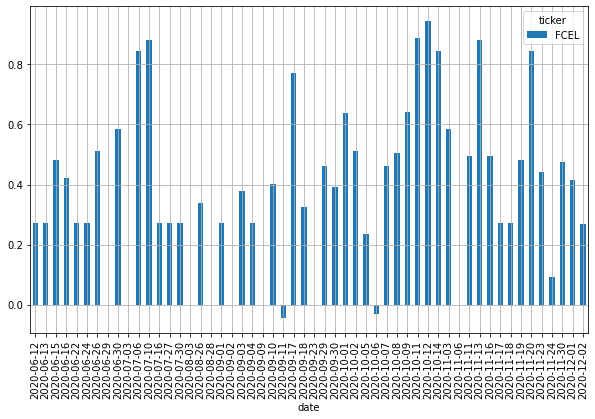

In [640]:
#plot FCEL
plt.rcParams['figure.figsize'] = [10, 6]
FCEL = energy_news_df.loc[energy_news_df['ticker'] == "FCEL"]
energy_mean_scores = FCEL.groupby(['ticker','date']).mean()
energy_mean_scores = energy_mean_scores.unstack()
energy_mean_scores = energy_mean_scores.xs('compound', axis="columns").transpose()
# Plot 
energy_mean_scores.plot(kind = 'bar')
plt.grid()

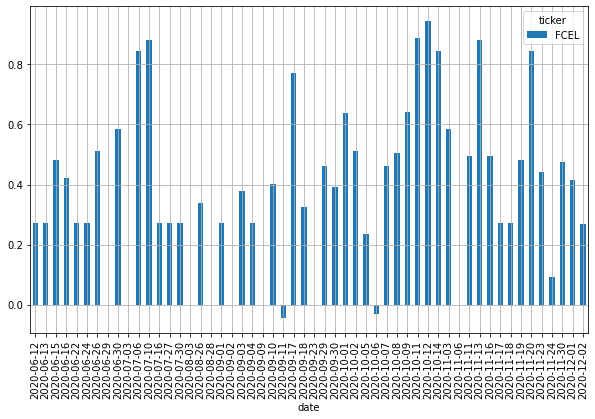

In [641]:
#plot WWR
plt.rcParams['figure.figsize'] = [10, 6]
WWR = energy_news_df.loc[energy_news_df['ticker'] == "WWR"]
energy_mean_scores1 = FCEL.groupby(['ticker','date']).mean()
energy_mean_scores1 = energy_mean_scores1.unstack()
energy_mean_scores1 = energy_mean_scores1.xs('compound', axis="columns").transpose()
# Plot 
energy_mean_scores1.plot(kind = 'bar')
plt.grid()

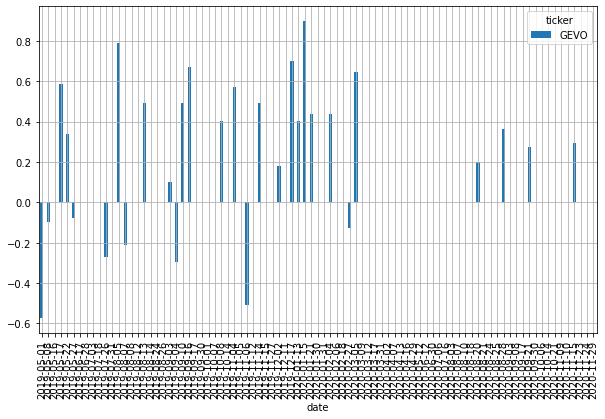

In [642]:
#plot GEVO
plt.rcParams['figure.figsize'] = [10, 6]
GEVO = energy_news_df.loc[energy_news_df['ticker'] == "GEVO"]
energy_mean_scores2 = GEVO.groupby(['ticker','date']).mean()
energy_mean_scores2 = energy_mean_scores2.unstack()
energy_mean_scores2 = energy_mean_scores2.xs('compound', axis="columns").transpose()
# Plot 
energy_mean_scores2.plot(kind = 'bar')
plt.grid()

In [643]:
 def append_holiday_values(ticker):
    ticker_processed = ticker[['date', 'compound']]
    ticker_processed.columns = ['date', 'news_value']
    ticker_processed['WEEKDAY'] = pd.to_datetime(ticker_processed['date']).dt.dayofweek  # monday = 0, sunday = 6
    for row in ticker_processed.itertuples(index=True, name='Pandas'):  
        if  row.WEEKDAY == 5 or row.WEEKDAY == 6 :# get saturdays and sundays 
            if row.Index==99: # end of dataframe
                pass
            else:
                if ticker_processed.iloc[row.Index, ticker_processed.columns.get_loc('news_value')]==0:
                    pass
                else:
                    ticker_processed.iloc[row.Index+1,ticker_processed.columns.get_loc('news_value')]=\
                    ticker_processed.iloc[row.Index+1,ticker_processed.columns.get_loc('news_value')]+\
                    ticker_processed.iloc[row.Index,ticker_processed.columns.get_loc('news_value')]
                    ticker_processed.iloc[row.Index,ticker_processed.columns.get_loc('news_value')]=0  
    ticker_processed = ticker_processed[ticker_processed.WEEKDAY != 6]
    ticker_processed = ticker_processed[ticker_processed.WEEKDAY != 5]             
    return ticker_processed


In [644]:
# reindex all tickers
SRNE = SRNE.reset_index(drop=True)
AZN = AZN.reset_index(drop=True)
PFE = PFE.reset_index(drop=True)
AAPL = AAPL.reset_index(drop=True)
NVDA = NVDA.reset_index(drop=True)
MSFT = MSFT.reset_index(drop=True)
TSLA = TSLA.reset_index(drop=True)
NIO = NIO.reset_index(drop=True)
PLTR = PLTR.reset_index(drop=True)
FCEL = FCEL.reset_index(drop=True)
WWR = WWR.reset_index(drop=True)
GEVO = GEVO.reset_index(drop=True)

In [665]:
# remove weekends and append their values to next working day 
SRNE_processed = append_holiday_values(SRNE)
# make sure no weekends remain if the final news coming happen to be on weekend 
SRNE_processed = SRNE_processed[SRNE_processed.WEEKDAY != 6]
SRNE_processed = SRNE_processed[SRNE_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
AZN_processed = append_holiday_values(AZN)
# make sure no weekends remain if the final news coming happen to be on weekend 
AZN_processed = AZN_processed[AZN_processed.WEEKDAY != 6]
AZN_processed = AZN_processed[AZN_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
PFE_processed = append_holiday_values(PFE)
# make sure no weekends remain if the final news coming happen to be on weekend 
PFE_processed = PFE_processed[PFE_processed.WEEKDAY != 6]
PFE_processed = PFE_processed[PFE_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
AAPL_processed = append_holiday_values(AAPL)
# make sure no weekends remain if the final news coming happen to be on weekend 
AAPL_processed = AAPL_processed[AAPL_processed.WEEKDAY != 6]
AAPL_processed = AAPL_processed[AAPL_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
NVDA_processed = append_holiday_values(NVDA)
# make sure no weekends remain if the final news coming happen to be on weekend 
NVDA_processed = NVDA_processed[NVDA_processed.WEEKDAY != 6]
NVDA_processed = NVDA_processed[NVDA_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
MSFT_processed = append_holiday_values(MSFT)
# make sure no weekends remain if the final news coming happen to be on weekend 
MSFT_processed = MSFT_processed[MSFT_processed.WEEKDAY != 6]
MSFT_processed = MSFT_processed[MSFT_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
TSLA_processed = append_holiday_values(TSLA)
# make sure no weekends remain if the final news coming happen to be on weekend 
TSLA_processed = TSLA_processed[TSLA_processed.WEEKDAY != 6]
TSLA_processed = TSLA_processed[TSLA_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
NIO_processed = append_holiday_values(NIO)
# make sure no weekends remain if the final news coming happen to be on weekend 
NIO_processed = NIO_processed[NIO_processed.WEEKDAY != 6]
NIO_processed = NIO_processed[NIO_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
PLTR_processed = append_holiday_values(PLTR)
# make sure no weekends remain if the final news coming happen to be on weekend 
PLTR_processed = PLTR_processed[PLTR_processed.WEEKDAY != 6]
PLTR_processed = PLTR_processed[PLTR_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
FCEL_processed = append_holiday_values(FCEL)
# make sure no weekends remain if the final news coming happen to be on weekend 
FCEL_processed = FCEL_processed[FCEL_processed.WEEKDAY != 6]
FCEL_processed = FCEL_processed[FCEL_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
WWR_processed = append_holiday_values(WWR)
# make sure no weekends remain if the final news coming happen to be on weekend 
WWR_processed = WWR_processed[WWR_processed.WEEKDAY != 6]
WWR_processed = WWR_processed[WWR_processed.WEEKDAY != 5]

# remove weekends and append their values to next working day 
GEVO_processed = append_holiday_values(GEVO)
# make sure no weekends remain if the final news coming happen to be on weekend 
GEVO_processed = GEVO_processed[GEVO_processed.WEEKDAY != 6]
GEVO_processed = GEVO_processed[GEVO_processed.WEEKDAY != 5]

In [686]:
SRNE_processed

,date,news_value,WEEKDAY
0,2020-12-02,-0.7906,2
2,2020-11-27,0.7906,4
3,2020-11-27,0.9818,4
4,2020-11-27,0.9406,4
5,2020-11-27,0.7906,4
...,...,...,...
95,2020-09-09,-0.7906,2
96,2020-09-03,-0.4019,3
97,2020-09-03,-0.7906,3
98,2020-09-02,-0.1531,2


In [685]:
AZN_processed

,date,news_value,WEEKDAY
0,2020-12-02,0.0000,2
1,2020-12-02,0.0000,2
2,2020-12-02,0.7603,2
3,2020-12-02,-0.3818,2
4,2020-12-02,-0.0258,2
...,...,...,...
95,2020-11-24,0.2732,1
96,2020-11-24,0.0000,1
97,2020-11-24,-0.3612,1
98,2020-11-24,0.4939,1


In [684]:
PFE_processed

,date,news_value,WEEKDAY
0,2020-12-02,0.1027,2
1,2020-12-02,0.7906,2
2,2020-12-02,-0.2584,2
3,2020-12-02,0.1027,2
4,2020-12-02,0.0000,2
...,...,...,...
95,2020-12-01,0.6597,1
96,2020-12-01,0.4019,1
97,2020-12-01,0.6124,1
98,2020-12-01,0.7783,1


In [683]:
AAPL_processed

,date,news_value,WEEKDAY
0,2020-12-02,0.0000,2
1,2020-12-02,-0.6908,2
2,2020-12-02,0.6369,2
3,2020-12-02,-0.4939,2
4,2020-12-02,0.8779,2
...,...,...,...
95,2020-11-27,0.0000,4
96,2020-11-27,0.0000,4
97,2020-11-26,0.0000,3
98,2020-11-26,0.0000,3


In [682]:
NVDA_processed

,date,news_value,WEEKDAY
0,2020-12-02,0.5267,2
1,2020-12-02,-0.7906,2
2,2020-12-02,-0.7906,2
3,2020-12-02,0.7906,2
4,2020-12-02,0.4215,2
...,...,...,...
95,2020-11-18,0.0000,2
96,2020-11-18,-0.2584,2
97,2020-11-18,0.0000,2
98,2020-11-17,0.0000,1


In [681]:
MSFT_processed

,date,news_value,WEEKDAY
0,2020-12-02,0.5267,2
1,2020-12-02,0.0000,2
2,2020-12-02,0.0000,2
3,2020-12-02,0.0000,2
4,2020-12-02,-0.6908,2
...,...,...,...
95,2020-11-26,0.5719,3
96,2020-11-26,0.0000,3
97,2020-11-25,0.8689,2
98,2020-11-25,0.4588,2


In [675]:
TSLA_processed.shape[0]

94

In [676]:
NIO_processed.shape[0]

97

In [677]:
PLTR_processed.shape[0]

70

In [678]:
FCEL_processed.shape[0]

98

In [679]:
WWR_processed.shape[0]

100

In [680]:
GEVO_processed.shape[0]

97